# FA
변수간의 상관관계를 바탕으로 다변량의 자료를 축소하고 요약하는 기법이며 
여러개의 변수가 있을 때 그것들의 공통 요인으로 묶어 차원 축소를 하는 방법이다.

In [2]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bfi.csv', index_col=0)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5', 'gender', 'education', 'age'],
      dtype='object')

In [4]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [20]:
len(df.columns)

25

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 61617 to 67560
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1         2784 non-null   float64
 1   A2         2773 non-null   float64
 2   A3         2774 non-null   float64
 3   A4         2781 non-null   float64
 4   A5         2784 non-null   float64
 5   C1         2779 non-null   float64
 6   C2         2776 non-null   float64
 7   C3         2780 non-null   float64
 8   C4         2774 non-null   float64
 9   C5         2784 non-null   float64
 10  E1         2777 non-null   float64
 11  E2         2784 non-null   float64
 12  E3         2775 non-null   float64
 13  E4         2791 non-null   float64
 14  E5         2779 non-null   float64
 15  N1         2778 non-null   float64
 16  N2         2779 non-null   float64
 17  N3         2789 non-null   float64
 18  N4         2764 non-null   float64
 19  N5         2771 non-null   float64
 20  O1 

In [5]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  


In [6]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


## 요인 수 선택

n_factors = 25

In [34]:
fa = FactorAnalyzer(n_factors=6,rotation=None)
fa.fit(df)

#Eigen값 체크 
ev, v = fa.get_eigenvalues()  ## 25개로 줄어들었어 뭔지는 모르겠는데


### 6가지 요인으로 분석

6과 같이 임의의 요인 개수를 선택한 후 요인 적재량을 확인한다. 각 변수별로 요인 적재량을 확인한 후 변수들에 대해 요인 적재량이 없다고 해석되는 개수만큼 요인 개수를 줄인다.

In [31]:
len(df.columns)

25

In [29]:
fa = FactorAnalyzer(n_factors=25, rotation="varimax") #ml : 최대우도 방법
fa.fit(df)
efa_result= pd.DataFrame(fa.loadings_, index=df.columns)
efa_result.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
A1,0.106334,-0.117779,0.022471,0.038669,0.066520,0.592844,0.019111,0.050653,-0.069738,-0.030041,...,0.015649,-0.020581,0.010313,0.050199,-0.003728,0.004941,-0.003549,0.004023,0.002555,0.0
A2,0.000477,0.377177,0.104060,-0.138645,-0.004403,-0.548711,0.023318,0.216248,0.046787,0.200340,...,0.069438,-0.098688,-0.001389,0.202965,-0.021055,0.022146,-0.012265,0.007155,0.003199,0.0
A3,0.000515,0.660788,0.095986,-0.112630,-0.014039,-0.331210,-0.023422,0.024284,-0.020433,0.162265,...,-0.097165,-0.001491,0.055777,0.085635,0.027546,-0.021659,-0.039467,0.049134,0.034976,0.0
A4,-0.076421,0.328427,0.152688,-0.097160,0.067983,-0.170011,-0.108980,0.018100,-0.048448,0.521680,...,0.008457,0.003011,-0.002735,0.002427,-0.000581,0.000027,0.000544,-0.001247,-0.000405,0.0
A5,-0.158662,0.681984,0.085093,-0.199798,-0.026191,-0.140134,-0.010646,0.054413,0.035217,0.064169,...,0.063891,0.004388,-0.037482,-0.063660,-0.032778,0.004443,-0.022561,-0.039931,-0.027180,0.0


### 요인 적재값
변수와 요인간의 관련성을 나타내는 값이다. 변수와 요인간의 관련된 정도를 나타낸다. 요인 적재값이 높을 수록 변수와 요인간의 높은 상관성을 띈다고 할 수 있다. 

### 공통성 ( fa.get_communalities() )
하나의 요인이 변수를 얼마나 설명하는가를 나타내는 값이다. 하나의 요인이 변수를 얼마나 잘 설명하는가에 대한 정도를 나타내는 값이다. 0.6이하의 값을 가질 경우 상대적으로 설명 하는데 좀 무리가 있다고 볼 수 있다. 즉 설명력이 낮다라고 볼 수 있다. 설명 정도

### 고유값 ( fa.get_elgenvalues() )
각 요인 값 별로 몇개의 측정 변수를 설명할 수 있는지를 나타낸다. 1미만일 경우 의미가 없다고 보면 된다. 

### 요인 점수


<AxesSubplot:>

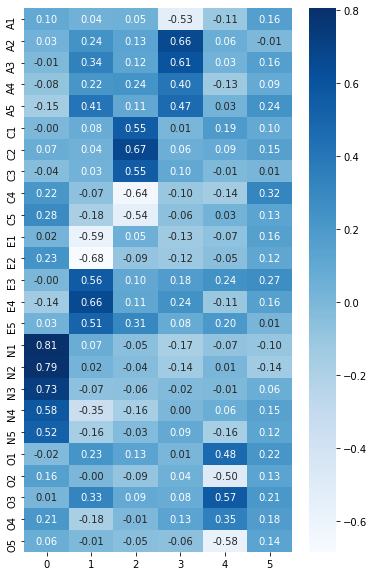

In [16]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

* 요인0 : N1, N2, N3, N4, N5에 대해 높은 요인 적재량을 가진다.
* 요인1 : E1, E2, E3, E4, E5에 대해 높은 요인 적재량을 가진다.
* 요인2 : C1, C2, C3, C4, C5에 대해 높은 요인 적재량을 가진다.
* 요인3 : A1, A2, A3, A4, A5에 대해 높은 요인 적재량을 가진다.
* 요인4 : O1, O2, O3, O4, O5에 대해 높은 요인 적재량을 가진다.
* 요인5 : 변수에 대해 높은 요인 적재량이 없다고 해석할 수 있다. 

따라서 5가지 요인, 요소만 이용하는 것이 좋다


### 5가지 요인으로 분석

In [17]:
fa = FactorAnalyzer(n_factors=5, rotation="varimax") #ml : 최대우도 방법
fa.fit(df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [18]:
fa.get_factor_variance()
df1 = pd.DataFrame(fa.get_factor_variance())
#행, 열 이름 설정
df1.index = ['SS Loadings', 'Proportion Var','Cumulative Var']
df1

,0,1,2,3,4
SS Loadings,2.709633,2.473090,2.041106,1.844498,1.522153
Proportion Var,0.108385,0.098924,0.081644,0.073780,0.060886
Cumulative Var,0.108385,0.207309,0.288953,0.362733,0.423619


---

## 특성값들

In [1]:
df1 = pd.read_csv('bfi.csv', index_col=0)
df1 = df1.drop(columns=['gender', 'education', 'age'], axis=0)

NameError: name 'pd' is not defined

In [45]:
df1.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [63]:
fa2 = FactorAnalyzer(method='principal', n_factors=3, rotation='varimax')
fa2.fit(df1)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [48]:
# 요인 적재값- 변수와 요인간의 관련성의 정도, 높은 상관을 가지고 있다..
print(pd.DataFrame(fa2.loadings_, index=df1.columns))


           0         1         2
A1 -0.264019  0.120338  0.003271
A2  0.594197  0.039932  0.127483
A3  0.686106  0.006265  0.084914
A4  0.458904 -0.092359  0.103475
A5  0.689331 -0.119285  0.071037
C1  0.060110  0.005899  0.646857
C2  0.101074  0.075045  0.650284
C3  0.084810 -0.054591  0.526424
C4 -0.067137  0.308142 -0.617499
C5 -0.163853  0.377874 -0.474538
E1 -0.585323  0.049965  0.049472
E2 -0.626132  0.289385 -0.063393
E3  0.653667  0.048073  0.193223
E4  0.727028 -0.140358 -0.007891
E5  0.503251  0.032562  0.388560
N1 -0.057665  0.768932 -0.088295
N2 -0.073591  0.772203 -0.039442
N3 -0.041580  0.787751 -0.056910
N4 -0.258343  0.670646 -0.093283
N5 -0.037183  0.611792 -0.123250
O1  0.250448  0.076743  0.434571
O2  0.077397  0.164199 -0.422993
O3  0.367202  0.101085  0.420481
O4 -0.037134  0.353613  0.261426
O5 -0.020853  0.032722 -0.420206


### 공통성
어느 하나의 요인이 변수를 얼마나 잘 설명하는가, 설명하는 정도를 나타낸 값이다.

In [50]:
# 공통성
print(pd.DataFrame(fa2.get_communalities(), index=df1.columns))


           0
A1  0.084198
A2  0.370916
A3  0.477992
A4  0.229830
A5  0.494452
C1  0.422072
C2  0.438717
C3  0.287296
C4  0.480764
C5  0.394823
E1  0.347547
E2  0.479804
E3  0.466927
E4  0.548332
E5  0.405301
N1  0.602378
N2  0.603269
N3  0.625519
N4  0.525208
N5  0.390862
O1  0.257466
O2  0.211875
O3  0.321860
O4  0.194765
O5  0.178079


### 고유값
요인들이 설명할 수 있는 변수의 개수

그나마 1이상인 요인들이 좋다.

In [64]:
ev, v = fa2.get_eigenvalues()
print(pd.DataFrame(ev))
# 5.010491
# 2.732287
# 2.097474

           0
0   5.010491
1   2.732287
2   2.097474
3   1.824836
4   1.530391
5   1.113368
6   0.847844
7   0.813628
8   0.736453
9   0.696971
10  0.684584
11  0.661061
12  0.630550
13  0.601250
14  0.566917
15  0.543387
16  0.525428
17  0.503229
18  0.493544
19  0.459074
20  0.436212
21  0.412694
22  0.410500
23  0.388286
24  0.279541


### 요인 점수
* 요인 적제값이 변수와 요인간의 상관관계를 나타낸다. 
* 요인 점수는 객체와 요인간의 상관 정도를 나타낸다. 

In [55]:
fa.transform(df1.dropna())

array([[-0.95743772, -0.95514139, -1.37814685,  0.4141231 , -0.7162905 ,
        -0.43381247],
       [-0.09141933,  0.09835564, -0.70213443, -0.19645807, -0.50764428,
        -0.01304624],
       [-0.31993882,  0.4016493 ,  0.36311898, -0.23867533, -0.86470966,
        -0.11016353],
       ...,
       [ 0.62768311,  0.02226264,  1.04821975, -0.63791663, -1.11012131,
        -0.20448809],
       [-0.6983969 ,  0.62073744,  0.93077703, -0.88350912, -2.05445947,
         0.16445684],
       [-0.94527691, -2.42734809,  0.89818109, -0.42307258, -0.41775019,
        -0.82809409]])

---

## 같은 값 테스트

In [5]:
df2 = pd.read_csv('bfi.csv', index_col=0)
df2 = df2.drop(columns=['gender', 'education', 'age'], axis=0)
df2.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [6]:
len(df2)

2800

In [7]:
df2['test0'] = 0

In [8]:
df2.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N2,N3,N4,N5,O1,O2,O3,O4,O5,test0
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,0


In [15]:
# 모두 0인 값이 들어가면 안된다. 
df2=df2.drop(columns='test0', axis=0)

KeyError: "['test0'] not found in axis"

In [19]:
df2['test0'] = 3000

In [20]:
df2.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N2,N3,N4,N5,O1,O2,O3,O4,O5,test0
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,3000
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,3000
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,3000
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,3000
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,3000


In [24]:
df2 = df2.drop(columns = 'test0', axis=0)

In [25]:
fa3 = FactorAnalyzer(method='principal', n_factors=3, rotation='varimax')
fa3.fit(df2)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})